In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

# Importing Retail
dataset_retail = pd.read_excel('Online_retail.xlsx')

# Importing Client .csv file resulting from Gephi
table_client = pd.read_csv('TableClient-Client.csv', delimiter=';')

# Importing Product .csv file resulting from Gephi
table_product = pd.read_csv('TableProduct-Product.csv', delimiter=';')

# Importing Product-Product and Client-Client files
product_product = pd.read_csv('Product-Product.csv', delimiter=';')

client_client = pd.read_csv('Client-Client.csv', delimiter=';')

Number of nodes: 3149
Number of edges: 467482


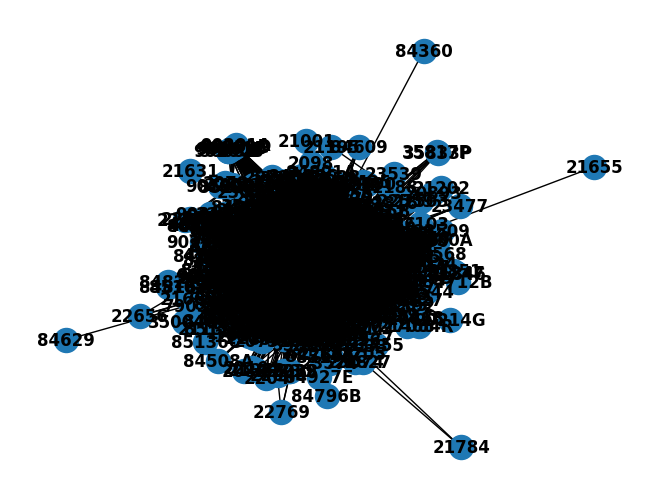

In [2]:
# Creating a graph from the edge list (Product-Product)
graph_product = nx.from_pandas_edgelist(product_product, source='Source', target='Target')

# Basic network analysis
print(f'Number of nodes: {graph_product.number_of_nodes()}')
print(f'Number of edges: {graph_product.number_of_edges()}')

# Drawing the graph
nx.draw(graph_product, with_labels=True, font_weight='bold')
plt.show()

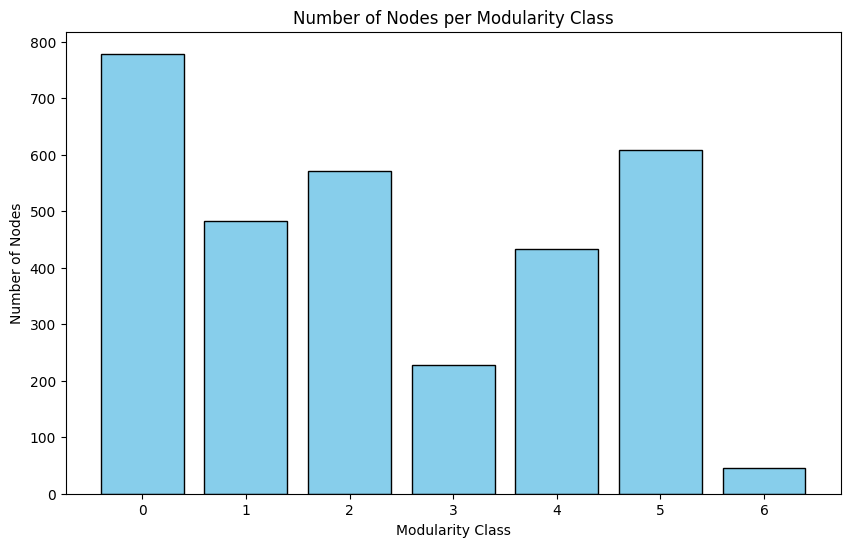

In [3]:
# Get modularity class and count the number of nodes per class
nodes_per_class_product = table_product.groupby('modularity_class', as_index=False)['Id'].count()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes_per_class_product.modularity_class, nodes_per_class_product.Id, color='skyblue', edgecolor='black')
plt.title('Number of Nodes per Modularity Class')
plt.xlabel('Modularity Class')
plt.ylabel('Number of Nodes')
plt.show()

In [32]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Merge product information with product-product network
merged_data = pd.merge(dataset_retail, table_product, left_on='Id', right_on='StockCode', how='left')

# Aggregate descriptions for each community
aggregated_descriptions = merged_data.groupby('modularity_class')['Description'].agg(lambda x: ' '.join(x.dropna())).reset_index()

# Tokenize and count occurrences per word for each community
word_counts_per_community = {}
for community, row in aggregated_descriptions.iterrows():
    tokens = word_tokenize(row['Description'])
    word_counts_per_community[community] = Counter(tokens)

# Find the most frequent words for each community
most_frequent_words_per_community = {}
for community, word_counts in word_counts_per_community.items():
    most_frequent_words = word_counts.most_common(5)
    most_frequent_words_per_community[community] = most_frequent_words

# Display the most frequent words for each community
for community, words in most_frequent_words_per_community.items():
    print(f"Community {community}: {words}")

KeyError: 'StockCode'

Number of nodes: 1743
Number of edges: 339610


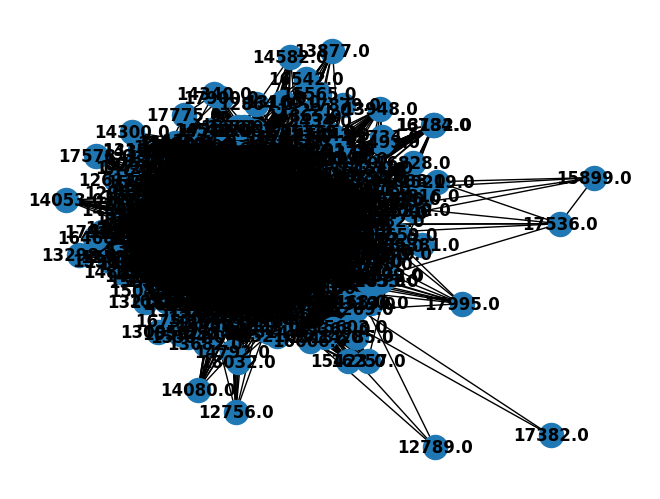

In [21]:
# Creating a graph from the edge list (Client-Client)
graph_client = nx.from_pandas_edgelist(client_client, source='Source', target='Target')

# Basic network analysis
print(f'Number of nodes: {graph_client.number_of_nodes()}')
print(f'Number of edges: {graph_client.number_of_edges()}')

# Drawing the graph
nx.draw(graph_client, with_labels=True, font_weight='bold')
plt.show()

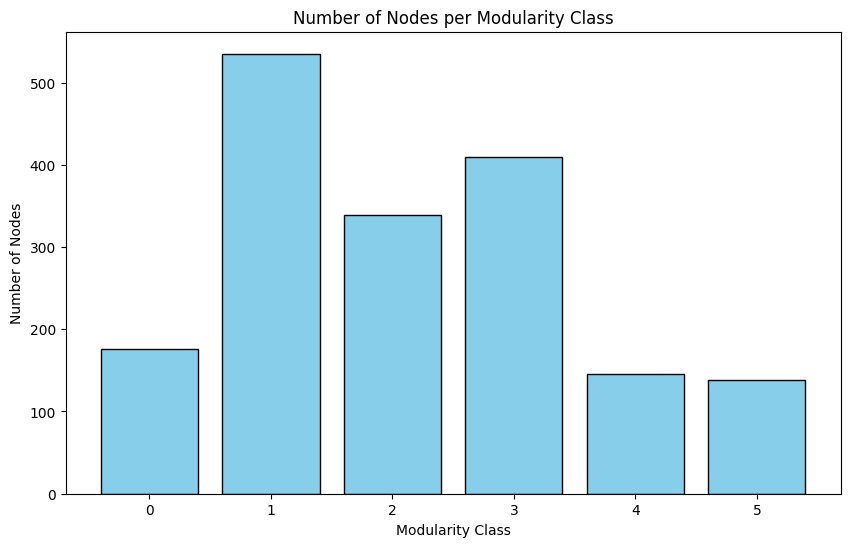

In [17]:
# Get modularity class and count the number of nodes per class
nodes_per_class_client = table_client.groupby('modularity_class', as_index=False)['Id'].count()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes_per_class_client.modularity_class, nodes_per_class_client.Id, color='skyblue', edgecolor='black')
plt.title('Number of Nodes per Modularity Class')
plt.xlabel('Modularity Class')
plt.ylabel('Number of Nodes')
plt.show()

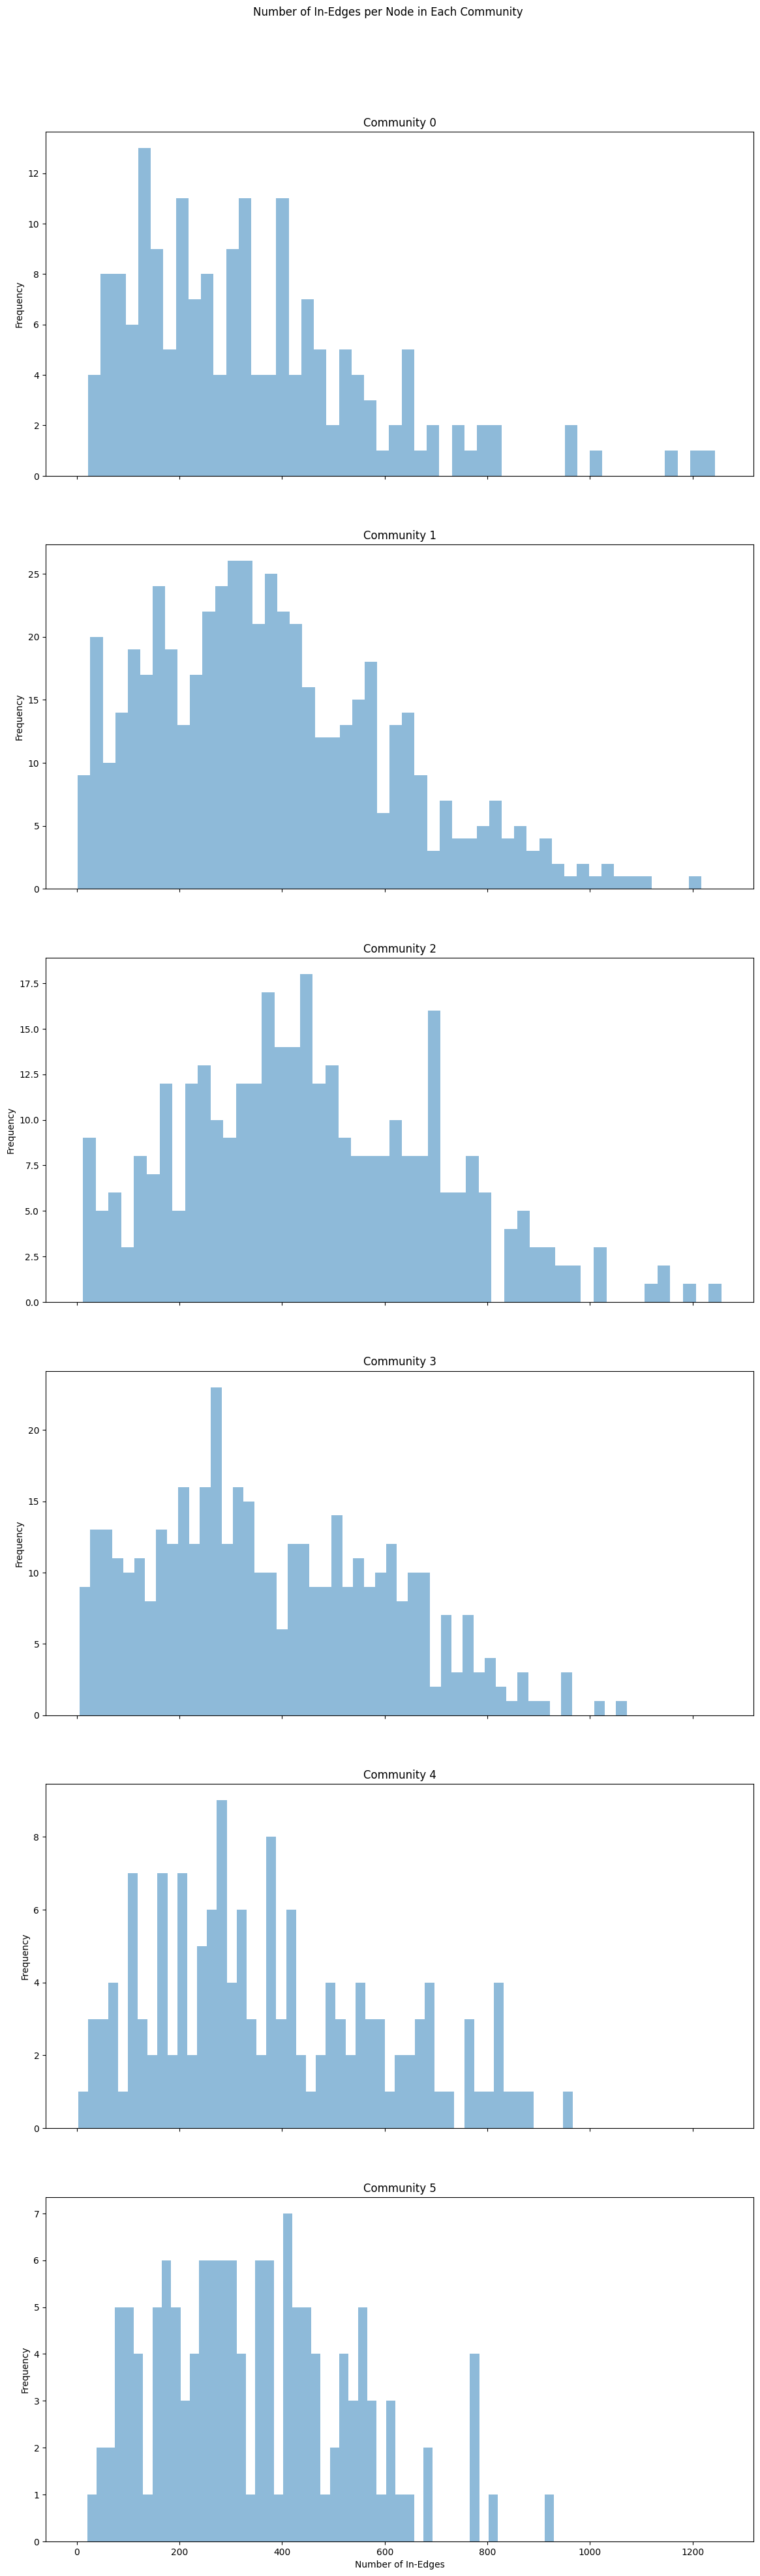

In [3]:
# Merge node information with the client-client network on 'Id' and 'Source'
merged_data = pd.merge(client_client, table_client, left_on='Source', right_on='Id', how='left')
merged_data.rename(columns={'modularity_class': 'Community'}, inplace=True)

# Create a directed graph from the client-client network edge list
G = nx.from_pandas_edgelist(merged_data, source='Source', target='Target', create_using=nx.DiGraph())

# Calculate the in-degree (number of edges coming into each node) for each node
in_degree_per_node = dict(G.in_degree())

# Get unique communities
unique_communities = sorted(merged_data['Community'].unique())

# Create subplots
fig, axs = plt.subplots(len(unique_communities), 1, figsize=(14, 8 * len(unique_communities)), sharex=True)

# Plot a histogram for each community
for idx, community in enumerate(unique_communities):
    group = merged_data[merged_data['Community'] == community]
    nodes = group['Source'].unique()
    in_degrees = [in_degree_per_node.get(node, 0) for node in nodes]
    axs[idx].hist(in_degrees, bins=50, alpha=0.5, label=f'Community {community}')
    axs[idx].set_title(f'Community {community}')
    axs[idx].set_ylabel('Frequency')

# Set common x-axis label
axs[-1].set_xlabel('Number of In-Edges')

plt.suptitle('Number of In-Edges per Node in Each Community', y=0.92)
plt.show()